# Global Temperature Analysis

## Importing libraries

In [1229]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

## Importing/Processing Dataset

In [1230]:
dataset = pd.read_csv('GlobalTemperatures.csv',
                  na_values = ':',
                  usecols = ["dt","LandAverageTemperature", "LandAndOceanAverageTemperature"])
dataset['dt'] = dataset['dt'].apply(lambda x: '.'.join(x.split('-')[:2]))
dataset

,dt,LandAverageTemperature,LandAndOceanAverageTemperature
0,1850.01,0.749,12.833
1,1850.02,3.071,13.588
2,1850.03,4.954,14.043
3,1850.04,7.217,14.667
4,1850.05,10.004,15.507
...,...,...,...
1987,2015.08,14.755,17.589
1988,2015.09,12.999,17.049
1989,2015.10,10.801,16.290
1990,2015.11,7.433,15.252


## X and Y values split up into 4 seasons of the year [Land Average Temperatures]

### 1st Quarter

In [1231]:
split_dt = dataset['dt'].astype(str).str.split('.', expand=True)

is_1st_Quarter = split_dt[1] == '03'

march_data = dataset[is_1st_Quarter]

x_1st = march_data['dt'].values.reshape(-1, 1)

print(x_1st)

[['1850.03']
 ['1851.03']
 ['1852.03']
 ['1853.03']
 ['1854.03']
 ['1855.03']
 ['1856.03']
 ['1857.03']
 ['1858.03']
 ['1859.03']
 ['1860.03']
 ['1861.03']
 ['1862.03']
 ['1863.03']
 ['1864.03']
 ['1865.03']
 ['1866.03']
 ['1867.03']
 ['1868.03']
 ['1869.03']
 ['1870.03']
 ['1871.03']
 ['1872.03']
 ['1873.03']
 ['1874.03']
 ['1875.03']
 ['1876.03']
 ['1877.03']
 ['1878.03']
 ['1879.03']
 ['1880.03']
 ['1881.03']
 ['1882.03']
 ['1883.03']
 ['1884.03']
 ['1885.03']
 ['1886.03']
 ['1887.03']
 ['1888.03']
 ['1889.03']
 ['1890.03']
 ['1891.03']
 ['1892.03']
 ['1893.03']
 ['1894.03']
 ['1895.03']
 ['1896.03']
 ['1897.03']
 ['1898.03']
 ['1899.03']
 ['1900.03']
 ['1901.03']
 ['1902.03']
 ['1903.03']
 ['1904.03']
 ['1905.03']
 ['1906.03']
 ['1907.03']
 ['1908.03']
 ['1909.03']
 ['1910.03']
 ['1911.03']
 ['1912.03']
 ['1913.03']
 ['1914.03']
 ['1915.03']
 ['1916.03']
 ['1917.03']
 ['1918.03']
 ['1919.03']
 ['1920.03']
 ['1921.03']
 ['1922.03']
 ['1923.03']
 ['1924.03']
 ['1925.03']
 ['1926.03']

In [1232]:

y_1st = march_data.iloc[ : , 1 : 2].values
print(y_1st)

[[4.95]
 [4.19]
 [3.88]
 [4.08]
 [4.7 ]
 [4.62]
 [4.37]
 [4.31]
 [4.83]
 [5.02]
 [3.49]
 [4.49]
 [4.49]
 [4.68]
 [4.65]
 [4.04]
 [4.42]
 [4.45]
 [4.54]
 [4.37]
 [4.66]
 [4.69]
 [4.92]
 [4.7 ]
 [4.22]
 [4.26]
 [4.75]
 [5.3 ]
 [6.61]
 [4.92]
 [4.63]
 [5.01]
 [5.04]
 [4.93]
 [3.89]
 [4.62]
 [4.26]
 [4.55]
 [4.3 ]
 [5.3 ]
 [4.21]
 [4.75]
 [4.36]
 [4.98]
 [5.12]
 [4.69]
 [4.28]
 [4.34]
 [3.75]
 [4.62]
 [5.49]
 [5.67]
 [4.88]
 [4.93]
 [4.51]
 [4.63]
 [4.87]
 [4.58]
 [4.14]
 [4.59]
 [4.61]
 [4.35]
 [4.36]
 [4.52]
 [4.94]
 [5.14]
 [4.85]
 [4.49]
 [4.81]
 [4.74]
 [5.23]
 [5.08]
 [5.16]
 [4.87]
 [5.35]
 [5.13]
 [5.83]
 [4.67]
 [4.96]
 [5.1 ]
 [5.48]
 [5.22]
 [4.94]
 [4.87]
 [4.82]
 [5.4 ]
 [5.03]
 [4.85]
 [5.65]
 [4.93]
 [5.42]
 [5.21]
 [5.31]
 [5.14]
 [5.53]
 [5.18]
 [5.24]
 [5.8 ]
 [4.92]
 [5.08]
 [5.25]
 [5.09]
 [4.97]
 [5.71]
 [5.15]
 [4.58]
 [4.89]
 [5.04]
 [5.45]
 [5.85]
 [4.3 ]
 [5.59]
 [5.53]
 [5.1 ]
 [4.87]
 [5.18]
 [5.53]
 [5.4 ]
 [6.12]
 [5.13]
 [5.27]
 [5.  ]
 [5.29]
 [5.82]
 [5.19]


### 2nd Quarter

In [1233]:
split_dt = dataset['dt'].astype(str).str.split('.', expand=True)

is_2nd_Quarter = split_dt[1] == '06'

june_data = dataset[is_2nd_Quarter]

x_2nd = june_data['dt'].values.reshape(-1, 1)

print(x_2nd)

[['1850.06']
 ['1851.06']
 ['1852.06']
 ['1853.06']
 ['1854.06']
 ['1855.06']
 ['1856.06']
 ['1857.06']
 ['1858.06']
 ['1859.06']
 ['1860.06']
 ['1861.06']
 ['1862.06']
 ['1863.06']
 ['1864.06']
 ['1865.06']
 ['1866.06']
 ['1867.06']
 ['1868.06']
 ['1869.06']
 ['1870.06']
 ['1871.06']
 ['1872.06']
 ['1873.06']
 ['1874.06']
 ['1875.06']
 ['1876.06']
 ['1877.06']
 ['1878.06']
 ['1879.06']
 ['1880.06']
 ['1881.06']
 ['1882.06']
 ['1883.06']
 ['1884.06']
 ['1885.06']
 ['1886.06']
 ['1887.06']
 ['1888.06']
 ['1889.06']
 ['1890.06']
 ['1891.06']
 ['1892.06']
 ['1893.06']
 ['1894.06']
 ['1895.06']
 ['1896.06']
 ['1897.06']
 ['1898.06']
 ['1899.06']
 ['1900.06']
 ['1901.06']
 ['1902.06']
 ['1903.06']
 ['1904.06']
 ['1905.06']
 ['1906.06']
 ['1907.06']
 ['1908.06']
 ['1909.06']
 ['1910.06']
 ['1911.06']
 ['1912.06']
 ['1913.06']
 ['1914.06']
 ['1915.06']
 ['1916.06']
 ['1917.06']
 ['1918.06']
 ['1919.06']
 ['1920.06']
 ['1921.06']
 ['1922.06']
 ['1923.06']
 ['1924.06']
 ['1925.06']
 ['1926.06']

In [1234]:
#y_land = june_data['LandAverageTemperature'].values.reshape(-1,1)
y_2nd = june_data.iloc[ : , 1 : 2].values
print(y_2nd)

[[13.15]
 [13.42]
 [13.16]
 [13.41]
 [12.83]
 [12.98]
 [13.5 ]
 [12.61]
 [12.96]
 [13.14]
 [13.27]
 [13.02]
 [12.86]
 [12.79]
 [13.37]
 [13.21]
 [12.85]
 [13.3 ]
 [13.16]
 [13.54]
 [13.65]
 [13.08]
 [13.05]
 [13.4 ]
 [13.31]
 [13.16]
 [13.13]
 [13.38]
 [13.8 ]
 [13.23]
 [13.33]
 [12.74]
 [12.8 ]
 [13.3 ]
 [12.53]
 [12.72]
 [12.79]
 [12.89]
 [12.92]
 [13.29]
 [12.87]
 [12.89]
 [13.26]
 [13.05]
 [12.86]
 [13.06]
 [13.3 ]
 [13.32]
 [13.39]
 [12.86]
 [13.29]
 [13.42]
 [13.21]
 [12.89]
 [13.01]
 [13.11]
 [13.33]
 [12.73]
 [13.29]
 [12.96]
 [13.15]
 [13.01]
 [13.44]
 [13.01]
 [13.5 ]
 [13.3 ]
 [12.94]
 [12.91]
 [12.91]
 [13.23]
 [13.11]
 [13.44]
 [13.33]
 [13.3 ]
 [13.34]
 [13.09]
 [13.29]
 [13.27]
 [13.11]
 [12.93]
 [13.35]
 [13.57]
 [13.38]
 [13.11]
 [13.4 ]
 [13.33]
 [13.36]
 [13.6 ]
 [13.32]
 [13.53]
 [13.58]
 [13.63]
 [13.58]
 [13.16]
 [13.48]
 [13.33]
 [13.3 ]
 [13.46]
 [13.66]
 [13.22]
 [13.38]
 [13.25]
 [13.44]
 [13.61]
 [13.4 ]
 [13.56]
 [13.16]
 [13.78]
 [13.19]
 [13.58]
 [13.48]
 

### 3rd Quarter

In [1235]:
split_dt = dataset['dt'].astype(str).str.split('.', expand=True)

is_3rd_Quarter = split_dt[1] == '09'

september_data = dataset[is_3rd_Quarter]

x_3rd = september_data['dt'].values.reshape(-1, 1)

print(x_3rd)

[['1850.09']
 ['1851.09']
 ['1852.09']
 ['1853.09']
 ['1854.09']
 ['1855.09']
 ['1856.09']
 ['1857.09']
 ['1858.09']
 ['1859.09']
 ['1860.09']
 ['1861.09']
 ['1862.09']
 ['1863.09']
 ['1864.09']
 ['1865.09']
 ['1866.09']
 ['1867.09']
 ['1868.09']
 ['1869.09']
 ['1870.09']
 ['1871.09']
 ['1872.09']
 ['1873.09']
 ['1874.09']
 ['1875.09']
 ['1876.09']
 ['1877.09']
 ['1878.09']
 ['1879.09']
 ['1880.09']
 ['1881.09']
 ['1882.09']
 ['1883.09']
 ['1884.09']
 ['1885.09']
 ['1886.09']
 ['1887.09']
 ['1888.09']
 ['1889.09']
 ['1890.09']
 ['1891.09']
 ['1892.09']
 ['1893.09']
 ['1894.09']
 ['1895.09']
 ['1896.09']
 ['1897.09']
 ['1898.09']
 ['1899.09']
 ['1900.09']
 ['1901.09']
 ['1902.09']
 ['1903.09']
 ['1904.09']
 ['1905.09']
 ['1906.09']
 ['1907.09']
 ['1908.09']
 ['1909.09']
 ['1910.09']
 ['1911.09']
 ['1912.09']
 ['1913.09']
 ['1914.09']
 ['1915.09']
 ['1916.09']
 ['1917.09']
 ['1918.09']
 ['1919.09']
 ['1920.09']
 ['1921.09']
 ['1922.09']
 ['1923.09']
 ['1924.09']
 ['1925.09']
 ['1926.09']

In [1236]:
#y_land = june_data['LandAverageTemperature'].values.reshape(-1,1)
y_3rd = september_data.iloc[ : , 1 : 2].values
print(y_3rd)

[[11.51]
 [11.68]
 [11.48]
 [11.71]
 [11.51]
 [11.14]
 [10.95]
 [11.06]
 [11.15]
 [11.08]
 [11.89]
 [11.41]
 [11.03]
 [11.23]
 [11.37]
 [11.8 ]
 [11.53]
 [11.76]
 [11.67]
 [12.25]
 [11.95]
 [11.71]
 [11.96]
 [11.49]
 [12.11]
 [11.32]
 [11.69]
 [12.07]
 [12.09]
 [11.45]
 [11.39]
 [11.69]
 [11.74]
 [11.34]
 [11.23]
 [11.44]
 [11.6 ]
 [11.71]
 [11.69]
 [11.55]
 [11.55]
 [11.76]
 [11.76]
 [11.77]
 [11.58]
 [11.74]
 [11.82]
 [11.93]
 [11.75]
 [12.13]
 [11.96]
 [11.98]
 [11.8 ]
 [11.5 ]
 [11.38]
 [11.8 ]
 [11.77]
 [11.66]
 [11.98]
 [11.88]
 [11.73]
 [11.64]
 [11.22]
 [11.76]
 [11.91]
 [11.87]
 [11.73]
 [11.74]
 [11.88]
 [11.99]
 [11.79]
 [11.87]
 [11.78]
 [11.88]
 [11.96]
 [11.98]
 [12.07]
 [12.25]
 [12.03]
 [11.81]
 [11.87]
 [12.28]
 [12.31]
 [11.85]
 [11.73]
 [12.  ]
 [12.02]
 [12.41]
 [12.43]
 [11.96]
 [12.27]
 [11.82]
 [12.15]
 [12.1 ]
 [12.45]
 [12.22]
 [12.06]
 [12.17]
 [12.15]
 [11.96]
 [11.95]
 [12.32]
 [12.24]
 [12.2 ]
 [12.1 ]
 [11.95]
 [11.78]
 [12.31]
 [11.85]
 [11.95]
 [12.1 ]
 

### 4th Quarter

In [1237]:
split_dt = dataset['dt'].astype(str).str.split('.', expand=True)

is_4th_Quarter = split_dt[1] == '12'

december_data = dataset[is_4th_Quarter]

x_4th = december_data['dt'].values.reshape(-1, 1)

print(x_4th)

[['1850.12']
 ['1851.12']
 ['1852.12']
 ['1853.12']
 ['1854.12']
 ['1855.12']
 ['1856.12']
 ['1857.12']
 ['1858.12']
 ['1859.12']
 ['1860.12']
 ['1861.12']
 ['1862.12']
 ['1863.12']
 ['1864.12']
 ['1865.12']
 ['1866.12']
 ['1867.12']
 ['1868.12']
 ['1869.12']
 ['1870.12']
 ['1871.12']
 ['1872.12']
 ['1873.12']
 ['1874.12']
 ['1875.12']
 ['1876.12']
 ['1877.12']
 ['1878.12']
 ['1879.12']
 ['1880.12']
 ['1881.12']
 ['1882.12']
 ['1883.12']
 ['1884.12']
 ['1885.12']
 ['1886.12']
 ['1887.12']
 ['1888.12']
 ['1889.12']
 ['1890.12']
 ['1891.12']
 ['1892.12']
 ['1893.12']
 ['1894.12']
 ['1895.12']
 ['1896.12']
 ['1897.12']
 ['1898.12']
 ['1899.12']
 ['1900.12']
 ['1901.12']
 ['1902.12']
 ['1903.12']
 ['1904.12']
 ['1905.12']
 ['1906.12']
 ['1907.12']
 ['1908.12']
 ['1909.12']
 ['1910.12']
 ['1911.12']
 ['1912.12']
 ['1913.12']
 ['1914.12']
 ['1915.12']
 ['1916.12']
 ['1917.12']
 ['1918.12']
 ['1919.12']
 ['1920.12']
 ['1921.12']
 ['1922.12']
 ['1923.12']
 ['1924.12']
 ['1925.12']
 ['1926.12']

In [1238]:
#y_land = june_data['LandAverageTemperature'].values.reshape(-1,1)
y_4th = december_data.iloc[ : , 1 : 2].values
print(y_4th)

[[2.8 ]
 [3.14]
 [3.79]
 [2.86]
 [3.46]
 [2.21]
 [3.38]
 [3.52]
 [2.44]
 [3.37]
 [1.63]
 [2.89]
 [1.62]
 [2.65]
 [2.27]
 [2.65]
 [4.15]
 [3.94]
 [3.34]
 [2.71]
 [2.23]
 [3.16]
 [2.63]
 [3.85]
 [3.41]
 [2.67]
 [2.19]
 [3.  ]
 [3.34]
 [2.54]
 [3.11]
 [3.2 ]
 [2.21]
 [3.26]
 [3.03]
 [3.64]
 [3.5 ]
 [2.88]
 [3.22]
 [3.1 ]
 [2.97]
 [3.6 ]
 [2.94]
 [3.15]
 [3.13]
 [3.46]
 [3.31]
 [3.17]
 [3.41]
 [3.  ]
 [3.65]
 [3.33]
 [2.71]
 [2.9 ]
 [3.37]
 [3.35]
 [3.76]
 [2.96]
 [3.07]
 [3.22]
 [2.68]
 [3.39]
 [3.07]
 [4.1 ]
 [3.6 ]
 [3.63]
 [2.32]
 [2.25]
 [2.85]
 [3.22]
 [2.63]
 [3.66]
 [3.67]
 [3.88]
 [3.48]
 [4.4 ]
 [3.37]
 [3.27]
 [3.87]
 [2.57]
 [3.83]
 [4.03]
 [3.53]
 [3.1 ]
 [3.98]
 [3.42]
 [3.92]
 [3.48]
 [3.51]
 [4.96]
 [4.13]
 [3.71]
 [3.94]
 [4.23]
 [3.43]
 [3.16]
 [3.13]
 [3.66]
 [3.49]
 [3.45]
 [3.53]
 [4.33]
 [3.66]
 [4.  ]
 [3.56]
 [3.31]
 [3.6 ]
 [4.33]
 [3.82]
 [3.77]
 [4.26]
 [3.5 ]
 [3.94]
 [3.75]
 [3.46]
 [3.77]
 [3.38]
 [3.92]
 [3.24]
 [4.21]
 [3.52]
 [3.87]
 [3.78]
 [3.83]
 [3.55]


## Other set of Y values representing Land and Ocean Average Temperatures

In [1239]:
y_1st_landO = march_data.iloc[ : , 2 : ].values
print(y_1st_landO)

[[14.04]
 [13.9 ]
 [13.74]
 [14.03]
 [14.09]
 [14.17]
 [13.96]
 [13.92]
 [14.04]
 [14.1 ]
 [13.71]
 [13.82]
 [14.04]
 [14.01]
 [13.99]
 [13.91]
 [13.95]
 [14.07]
 [14.13]
 [13.95]
 [14.14]
 [14.22]
 [14.11]
 [14.15]
 [13.81]
 [13.97]
 [14.05]
 [14.46]
 [14.88]
 [14.34]
 [14.27]
 [14.36]
 [14.34]
 [14.24]
 [13.91]
 [14.02]
 [13.89]
 [13.95]
 [13.97]
 [14.45]
 [13.89]
 [14.19]
 [13.98]
 [14.11]
 [14.08]
 [13.99]
 [14.05]
 [14.15]
 [13.75]
 [14.  ]
 [14.4 ]
 [14.38]
 [14.1 ]
 [14.05]
 [13.86]
 [14.04]
 [14.24]
 [14.15]
 [13.78]
 [13.85]
 [13.87]
 [13.75]
 [13.99]
 [13.95]
 [14.1 ]
 [14.32]
 [14.12]
 [13.8 ]
 [14.03]
 [14.22]
 [14.25]
 [14.13]
 [14.24]
 [14.05]
 [14.32]
 [14.15]
 [14.54]
 [14.08]
 [14.23]
 [14.08]
 [14.33]
 [14.35]
 [14.25]
 [14.13]
 [14.07]
 [14.27]
 [14.21]
 [14.28]
 [14.49]
 [14.27]
 [14.48]
 [14.43]
 [14.54]
 [14.37]
 [14.63]
 [14.46]
 [14.51]
 [14.54]
 [14.28]
 [14.32]
 [14.3 ]
 [14.28]
 [14.37]
 [14.56]
 [14.38]
 [14.18]
 [14.23]
 [14.38]
 [14.55]
 [14.61]
 [14.14]
 

In [1240]:
y_2nd_landO = june_data.iloc[ : , 2 : ].values
print(y_2nd_landO)

[[16.35]
 [16.5 ]
 [16.62]
 [16.46]
 [16.29]
 [16.45]
 [16.49]
 [16.18]
 [16.17]
 [16.4 ]
 [16.34]
 [16.36]
 [16.35]
 [16.22]
 [16.49]
 [16.41]
 [16.6 ]
 [16.37]
 [16.53]
 [16.4 ]
 [16.51]
 [16.46]
 [16.36]
 [16.43]
 [16.21]
 [16.36]
 [16.29]
 [16.59]
 [16.71]
 [16.5 ]
 [16.4 ]
 [16.33]
 [16.36]
 [16.51]
 [16.19]
 [16.11]
 [16.2 ]
 [16.21]
 [16.36]
 [16.5 ]
 [16.25]
 [16.3 ]
 [16.3 ]
 [16.38]
 [16.23]
 [16.35]
 [16.52]
 [16.51]
 [16.39]
 [16.24]
 [16.52]
 [16.44]
 [16.28]
 [16.16]
 [16.21]
 [16.38]
 [16.44]
 [16.25]
 [16.29]
 [16.19]
 [16.26]
 [16.11]
 [16.4 ]
 [16.22]
 [16.42]
 [16.45]
 [16.29]
 [16.24]
 [16.31]
 [16.38]
 [16.42]
 [16.49]
 [16.41]
 [16.45]
 [16.46]
 [16.41]
 [16.58]
 [16.44]
 [16.36]
 [16.33]
 [16.47]
 [16.63]
 [16.5 ]
 [16.34]
 [16.58]
 [16.5 ]
 [16.52]
 [16.68]
 [16.61]
 [16.71]
 [16.73]
 [16.75]
 [16.73]
 [16.6 ]
 [16.77]
 [16.66]
 [16.51]
 [16.7 ]
 [16.74]
 [16.47]
 [16.66]
 [16.77]
 [16.75]
 [16.89]
 [16.61]
 [16.55]
 [16.47]
 [16.88]
 [16.62]
 [16.78]
 [16.67]
 

In [1241]:
y_3rd_landO = september_data.iloc[ : , 2 : ].values
print(y_3rd_landO)

[[15.89]
 [16.06]
 [16.04]
 [15.94]
 [16.1 ]
 [15.83]
 [15.64]
 [15.84]
 [15.83]
 [15.59]
 [16.13]
 [15.93]
 [15.79]
 [15.9 ]
 [15.85]
 [16.08]
 [15.92]
 [16.15]
 [16.11]
 [16.18]
 [16.07]
 [16.02]
 [16.17]
 [15.96]
 [16.12]
 [16.06]
 [15.89]
 [16.44]
 [16.27]
 [16.01]
 [15.92]
 [15.98]
 [16.11]
 [15.96]
 [15.83]
 [15.91]
 [15.83]
 [15.92]
 [15.99]
 [15.91]
 [15.84]
 [16.07]
 [16.  ]
 [15.93]
 [15.93]
 [15.98]
 [16.14]
 [16.07]
 [15.91]
 [16.18]
 [16.12]
 [16.  ]
 [16.03]
 [15.77]
 [15.77]
 [16.  ]
 [15.95]
 [15.9 ]
 [15.93]
 [15.85]
 [15.88]
 [15.8 ]
 [15.69]
 [15.87]
 [16.07]
 [16.1 ]
 [15.93]
 [16.06]
 [16.07]
 [16.02]
 [16.12]
 [16.17]
 [15.98]
 [15.99]
 [16.  ]
 [16.14]
 [16.22]
 [16.22]
 [16.07]
 [16.09]
 [16.25]
 [16.29]
 [16.26]
 [16.02]
 [16.13]
 [16.14]
 [16.19]
 [16.4 ]
 [16.37]
 [16.3 ]
 [16.43]
 [16.19]
 [16.27]
 [16.29]
 [16.47]
 [16.36]
 [16.25]
 [16.26]
 [16.24]
 [16.18]
 [16.12]
 [16.43]
 [16.39]
 [16.42]
 [16.22]
 [16.15]
 [16.09]
 [16.38]
 [16.28]
 [16.28]
 [16.38]
 

In [1242]:
y_4th_landO = december_data.iloc[ : , 2 : ].values
print(y_4th_landO)

[[13.3 ]
 [13.64]
 [13.78]
 [13.32]
 [13.47]
 [13.21]
 [13.32]
 [13.37]
 [13.26]
 [13.51]
 [12.83]
 [13.34]
 [12.73]
 [13.36]
 [13.27]
 [13.26]
 [13.73]
 [13.55]
 [13.64]
 [13.31]
 [13.18]
 [13.44]
 [13.33]
 [13.53]
 [13.43]
 [13.23]
 [13.19]
 [13.7 ]
 [13.53]
 [13.32]
 [13.48]
 [13.51]
 [13.19]
 [13.45]
 [13.27]
 [13.54]
 [13.32]
 [13.39]
 [13.61]
 [13.4 ]
 [13.37]
 [13.56]
 [13.2 ]
 [13.39]
 [13.35]
 [13.51]
 [13.64]
 [13.4 ]
 [13.35]
 [13.41]
 [13.6 ]
 [13.38]
 [13.24]
 [13.21]
 [13.43]
 [13.45]
 [13.54]
 [13.22]
 [13.19]
 [13.22]
 [13.02]
 [13.43]
 [13.23]
 [13.62]
 [13.6 ]
 [13.54]
 [13.01]
 [13.1 ]
 [13.44]
 [13.26]
 [13.31]
 [13.63]
 [13.5 ]
 [13.74]
 [13.34]
 [13.9 ]
 [13.54]
 [13.49]
 [13.57]
 [13.21]
 [13.72]
 [13.71]
 [13.56]
 [13.35]
 [13.67]
 [13.55]
 [13.77]
 [13.68]
 [13.56]
 [14.09]
 [13.96]
 [13.97]
 [13.87]
 [13.96]
 [13.77]
 [13.62]
 [13.53]
 [13.69]
 [13.54]
 [13.63]
 [13.59]
 [13.99]
 [13.79]
 [13.86]
 [13.62]
 [13.52]
 [13.7 ]
 [13.97]
 [13.83]
 [13.76]
 [13.93]
 

## Converting x data into numerical value in data set

In [1243]:
def convert_dates(x_data):
    # Convert to numpy array and then to floats
    x_floats = np.array(x_data).astype(float).flatten()

    # Extract year and month
    years = np.floor(x_floats).astype(int)
    months = np.round((x_floats - years) * 12).astype(int)
    months[months == 0] = 1  # Handle the case where month becomes 0

    # Create datetime objects
    x_dates = pd.to_datetime({'year': years, 'month': months, 'day': np.ones_like(years)})
    return x_dates

x_1st_date = convert_dates(x_1st)
x_2nd_date = convert_dates(x_2nd)
x_3rd_date = convert_dates(x_3rd)
x_4th_date = convert_dates(x_4th)

x_1st_numeric = np.array([float(date) for date in x_1st.flatten()])
x_2nd_numeric = np.array([float(date) for date in x_2nd.flatten()])
x_3rd_numeric = np.array([float(date) for date in x_3rd.flatten()])
x_4th_numeric = np.array([float(date) for date in x_4th.flatten()])

## Splitting dataset into Training and Test set [split into 4 quarters]

In [1244]:
from sklearn.model_selection import train_test_split
x_1st_train, x_1st_test, y_1st_train, y_1st_test = train_test_split(x_1st, y_1st, test_size = 0.2, random_state = 0)
x_2nd_train, x_2nd_test, y_2nd_train, y_2nd_test = train_test_split(x_2nd, y_2nd, test_size = 0.2, random_state = 0)
x_3rd_train, x_3rd_test, y_3rd_train, y_3rd_test = train_test_split(x_3rd, y_3rd, test_size = 0.2, random_state = 0)
x_4th_train, x_4th_test, y_4th_train, y_4th_test = train_test_split(x_4th, y_4th, test_size = 0.2, random_state = 0)

#Training and test sets below represent the land and ocean averages

x_1st_train_LO, x_1st_test_LO, y_1st_train_LO, y_1st_test_LO = train_test_split(x_1st, y_1st_landO, test_size = 0.2, random_state = 0)
x_2nd_train_LO, x_2nd_test_LO, y_2nd_train_LO, y_2nd_test_LO = train_test_split(x_2nd, y_2nd_landO, test_size = 0.2, random_state = 0)
x_3rd_train_LO, x_3rd_test_LO, y_3rd_train_LO, y_3rd_test_LO = train_test_split(x_3rd, y_3rd_landO, test_size = 0.2, random_state = 0)
x_4th_train_LO, x_4th_test_LO, y_4th_train_LO, y_4th_test_LO = train_test_split(x_4th, y_4th_landO, test_size = 0.2, random_state = 0)


## Setting up the LR model on the training set

In [1245]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor_1st = LinearRegression()
regressor_2nd = LinearRegression()
regressor_3rd = LinearRegression()
regressor_4th = LinearRegression()

regressor_1st_LO = LinearRegression()
regressor_2nd_LO = LinearRegression()
regressor_3rd_LO = LinearRegression()
regressor_4th_LO = LinearRegression()

regressor_1st.fit(x_1st_train, y_1st_train)
regressor_2nd.fit(x_2nd_train, y_2nd_train)
regressor_3rd.fit(x_3rd_train, y_3rd_train)
regressor_4th.fit(x_4th_train, y_4th_train)

regressor_1st_LO.fit(x_1st_train_LO, y_1st_train_LO)
regressor_2nd_LO.fit(x_2nd_train_LO, y_2nd_train_LO)
regressor_3rd_LO.fit(x_3rd_train_LO, y_3rd_train_LO)
regressor_4th_LO.fit(x_4th_train_LO, y_4th_train_LO)









LinearRegression()

## Predicting the test set results for Land Average Temperatures

### 1st Quarter test Results

In [1246]:
y_1st_predicted = regressor_1st.predict(x_1st_numeric.reshape(-1,1))
y_1st_pred = regressor_1st.predict(x_1st_test)
np.set_printoptions(precision=2, suppress = True)
print(np.concatenate((y_1st_pred, y_1st_test), axis=1))

[[6.08 6.26]
 [5.75 5.67]
 [5.28 5.14]
 [4.85 4.63]
 [5.92 5.53]
 [4.84 4.51]
 [4.3  4.31]
 [4.28 4.62]
 [5.76 5.45]
 [4.92 4.35]
 [5.54 5.53]
 [5.81 5.79]
 [5.36 5.25]
 [5.34 4.92]
 [4.8  5.67]
 [5.83 5.57]
 [5.9  6.01]
 [5.66 4.52]
 [4.73 4.69]
 [5.3  5.18]
 [5.65 5.71]
 [4.6  4.93]
 [4.86 4.87]
 [5.61 5.29]
 [4.52 4.75]
 [5.97 6.05]
 [5.43 4.89]
 [4.31 4.83]
 [5.05 4.87]
 [4.64 4.55]
 [4.72 5.12]
 [5.32 5.24]
 [5.96 6.77]
 [4.91 4.61]]


### 2nd Quarter Results

In [1247]:
y_2nd_predicted = regressor_2nd.predict(x_2nd_numeric.reshape(-1,1))
y_2nd_pred = regressor_2nd.predict(x_2nd_test)
np.set_printoptions(precision=2, suppress = True)
print(np.concatenate((y_2nd_pred, y_2nd_test), axis=1))

[[13.94 14.57]
 [13.76 13.39]
 [13.49 13.16]
 [13.25 13.11]
 [13.85 14.03]
 [13.25 13.01]
 [12.95 12.61]
 [12.93 12.98]
 [13.76 13.57]
 [13.29 13.01]
 [13.64 13.59]
 [13.79 13.45]
 [13.54 13.38]
 [13.53 13.66]
 [13.23 13.42]
 [13.8  14.26]
 [13.84 14.13]
 [13.71 13.09]
 [13.19 13.06]
 [13.51 13.33]
 [13.7  13.56]
 [13.11 13.3 ]
 [13.26 13.33]
 [13.68 13.5 ]
 [13.07 13.13]
 [13.88 14.02]
 [13.58 13.16]
 [12.95 12.96]
 [13.37 13.3 ]
 [13.14 12.89]
 [13.18 12.86]
 [13.51 13.3 ]
 [13.87 14.08]
 [13.28 13.15]]


### 3rd Quarter Results

In [1248]:
y_3rd_predicted = regressor_3rd.predict(x_3rd_numeric.reshape(-1,1))
y_3rd_pred = regressor_3rd.predict(x_3rd_test)
np.set_printoptions(precision=2, suppress = True)
print(np.concatenate((y_3rd_pred, y_3rd_test), axis=1))

[[12.59 13.15]
 [12.38 12.02]
 [12.09 12.1 ]
 [11.81 11.8 ]
 [12.49 12.72]
 [11.81 11.38]
 [11.47 11.06]
 [11.45 11.14]
 [12.39 11.98]
 [11.86 11.64]
 [12.25 12.13]
 [12.42 12.4 ]
 [12.14 11.95]
 [12.12 12.15]
 [11.78 11.98]
 [12.43 12.68]
 [12.48 12.69]
 [12.33 11.89]
 [11.74 11.74]
 [12.1  12.22]
 [12.32 12.15]
 [11.65 11.34]
 [11.82 11.77]
 [12.3  11.9 ]
 [11.6  11.69]
 [12.52 12.91]
 [12.18 11.78]
 [11.47 11.15]
 [11.94 11.88]
 [11.68 11.71]
 [11.73 11.58]
 [12.11 12.06]
 [12.51 12.95]
 [11.85 11.73]]


### 4th Quarter Results

In [1249]:
y_4th_predicted = regressor_4th.predict(x_4th_numeric.reshape(-1,1))
y_4th_pred = regressor_4th.predict(x_4th_test)
np.set_printoptions(precision=2, suppress = True)
print(np.concatenate((y_4th_pred, y_4th_test), axis=1))

[[4.43 4.72]
 [4.13 3.19]
 [3.7  4.23]
 [3.31 3.35]
 [4.29 4.57]
 [3.3  3.37]
 [2.81 3.52]
 [2.79 2.21]
 [4.14 3.79]
 [3.37 3.39]
 [3.94 3.38]
 [4.18 4.43]
 [3.78 3.53]
 [3.76 3.49]
 [3.27 3.33]
 [4.2  4.06]
 [4.27 4.42]
 [4.05 3.68]
 [3.2  3.46]
 [3.72 3.16]
 [4.04 3.67]
 [3.08 3.26]
 [3.32 3.76]
 [4.01 3.78]
 [3.01 2.19]
 [4.33 5.13]
 [3.84 3.6 ]
 [2.82 2.44]
 [3.5  3.88]
 [3.12 2.88]
 [3.19 3.13]
 [3.74 3.13]
 [4.32 4.04]
 [3.36 2.68]]


## Predicting the test set results for the Land and Ocean Average Temperatures

### 1st Quarter Results

In [1250]:
y_1st_LO_predicted = regressor_1st_LO.predict(x_1st_numeric.reshape(-1,1))
y_1st_pred_LO = regressor_1st_LO.predict(x_1st_test_LO)
np.set_printoptions(precision=2, suppress = True)
print(np.concatenate((y_1st_pred_LO, y_1st_test_LO), axis=1))

[[14.84 14.95]
 [14.66 14.61]
 [14.41 14.37]
 [14.18 14.04]
 [14.75 14.68]
 [14.18 13.86]
 [13.89 13.92]
 [13.88 14.17]
 [14.67 14.53]
 [14.22 13.75]
 [14.55 14.45]
 [14.69 14.61]
 [14.46 14.3 ]
 [14.44 14.28]
 [14.16 14.38]
 [14.7  14.69]
 [14.74 14.87]
 [14.61 14.12]
 [14.12 13.99]
 [14.43 14.46]
 [14.61 14.54]
 [14.05 14.24]
 [14.19 14.24]
 [14.59 14.45]
 [14.01 14.05]
 [14.78 14.97]
 [14.49 14.23]
 [13.9  14.04]
 [14.29 14.05]
 [14.08 13.95]
 [14.12 14.08]
 [14.43 14.51]
 [14.77 15.2 ]
 [14.21 13.87]]


### 2nd Quarter Results

In [1251]:
y_2nd_LO_predicted = regressor_2nd_LO.predict(x_2nd_numeric.reshape(-1,1))
y_2nd_pred_LO = regressor_2nd_LO.predict(x_2nd_test_LO)
np.set_printoptions(precision=2, suppress = True)
print(np.concatenate((y_2nd_pred_LO, y_2nd_test_LO), axis=1))

[[17.01 17.26]
 [16.86 16.67]
 [16.66 16.6 ]
 [16.47 16.38]
 [16.94 16.96]
 [16.47 16.21]
 [16.24 16.18]
 [16.23 16.45]
 [16.87 16.71]
 [16.5  16.11]
 [16.78 16.69]
 [16.89 16.73]
 [16.7  16.66]
 [16.69 16.74]
 [16.46 16.44]
 [16.9  17.05]
 [16.93 17.16]
 [16.82 16.45]
 [16.43 16.35]
 [16.67 16.66]
 [16.82 16.68]
 [16.37 16.51]
 [16.48 16.44]
 [16.81 16.73]
 [16.33 16.29]
 [16.96 17.1 ]
 [16.73 16.47]
 [16.24 16.17]
 [16.56 16.45]
 [16.39 16.21]
 [16.42 16.23]
 [16.68 16.51]
 [16.95 17.11]
 [16.5  16.26]]


### 3rd Quarter Results

In [1252]:
y_3rd_LO_predicted = regressor_3rd_LO.predict(x_3rd_numeric.reshape(-1,1))
y_3rd_pred_LO = regressor_3rd_LO.predict(x_3rd_test_LO)
np.set_printoptions(precision=2, suppress = True)
print(np.concatenate((y_3rd_pred_LO, y_3rd_test_LO), axis=1))

[[16.62 16.89]
 [16.47 16.39]
 [16.28 16.29]
 [16.09 16.  ]
 [16.55 16.61]
 [16.09 15.77]
 [15.86 15.84]
 [15.85 15.83]
 [16.48 16.36]
 [16.12 15.8 ]
 [16.39 16.27]
 [16.5  16.5 ]
 [16.31 16.12]
 [16.3  16.24]
 [16.07 16.  ]
 [16.51 16.57]
 [16.54 16.77]
 [16.44 16.18]
 [16.04 15.98]
 [16.29 16.36]
 [16.43 16.22]
 [15.98 15.96]
 [16.1  15.95]
 [16.42 16.27]
 [15.95 15.89]
 [16.57 16.84]
 [16.34 16.09]
 [15.86 15.83]
 [16.18 15.99]
 [16.   15.92]
 [16.04 15.93]
 [16.29 16.25]
 [16.56 16.8 ]
 [16.12 15.88]]


### 4th Quarter Results

In [1253]:
y_4th_LO_predicted = regressor_4th_LO.predict(x_4th_numeric.reshape(-1,1))
y_4th_pred_LO = regressor_4th_LO.predict(x_4th_test_LO)
np.set_printoptions(precision=2, suppress = True)
print(np.concatenate((y_4th_pred_LO, y_4th_test_LO), axis=1))

[[14.12 14.34]
 [13.95 13.6 ]
 [13.72 13.96]
 [13.51 13.45]
 [14.04 14.13]
 [13.5  13.43]
 [13.23 13.37]
 [13.22 13.21]
 [13.96 13.81]
 [13.54 13.43]
 [13.85 13.68]
 [13.98 14.06]
 [13.76 13.59]
 [13.75 13.54]
 [13.48 13.38]
 [13.99 13.98]
 [14.03 14.29]
 [13.91 13.84]
 [13.45 13.51]
 [13.73 13.62]
 [13.9  13.56]
 [13.38 13.45]
 [13.51 13.54]
 [13.89 13.95]
 [13.34 13.19]
 [14.06 14.44]
 [13.8  13.7 ]
 [13.24 13.26]
 [13.61 13.74]
 [13.4  13.39]
 [13.44 13.35]
 [13.74 13.53]
 [14.06 14.13]
 [13.53 13.02]]


## Plotting Land Average Temperature results

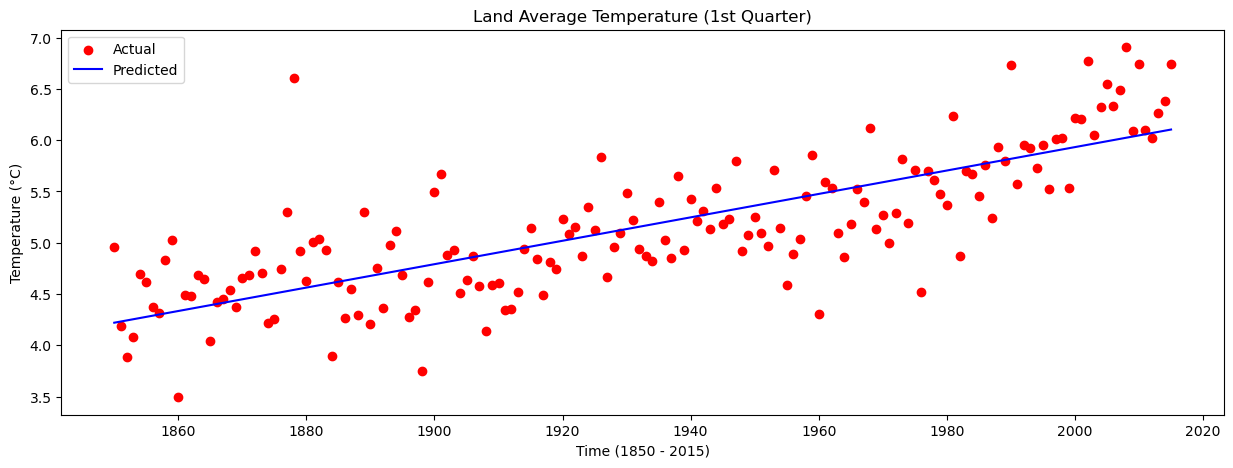

In [1254]:
plt.figure(figsize=(15, 5))
plt.scatter(x_1st_date, y_1st[:,0].flatten(), color='red', label='Actual')
plt.plot(x_1st_date, y_1st_predicted, color='blue', label='Predicted')
plt.title('Land Average Temperature (1st Quarter)')
plt.xlabel('Time (1850 - 2015)')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.show()

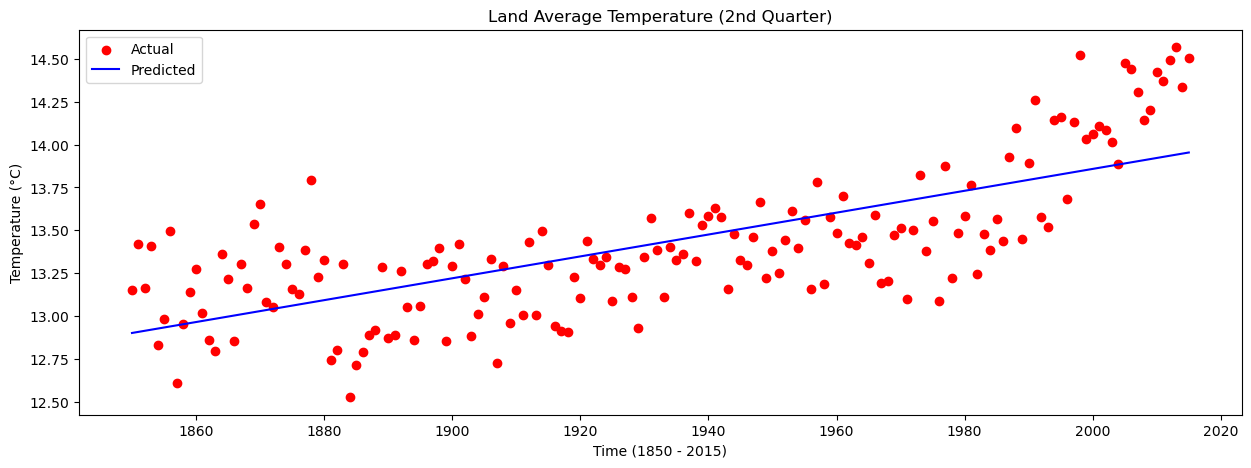

In [1255]:
plt.figure(figsize=(15, 5))
plt.scatter(x_2nd_date, y_2nd[:,0].flatten(), color='red', label='Actual')
plt.plot(x_2nd_date, y_2nd_predicted, color='blue', label='Predicted')
plt.title('Land Average Temperature (2nd Quarter)')
plt.xlabel('Time (1850 - 2015)')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.show()

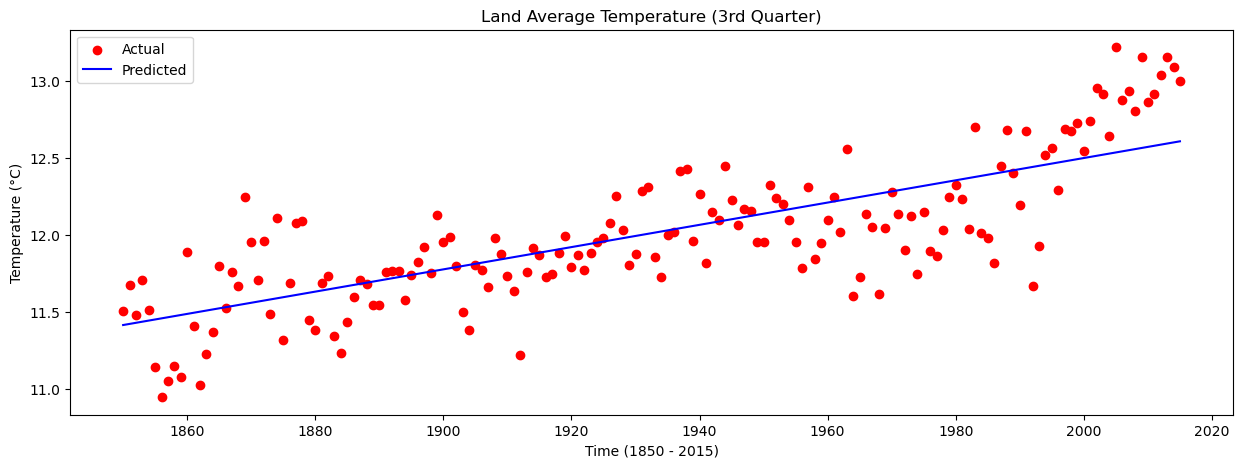

In [1256]:
plt.figure(figsize=(15, 5))
plt.scatter(x_3rd_date, y_3rd[:,0].flatten(), color='red', label='Actual')
plt.plot(x_3rd_date, y_3rd_predicted, color='blue', label='Predicted')
plt.title('Land Average Temperature (3rd Quarter)')
plt.xlabel('Time (1850 - 2015)')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.show()

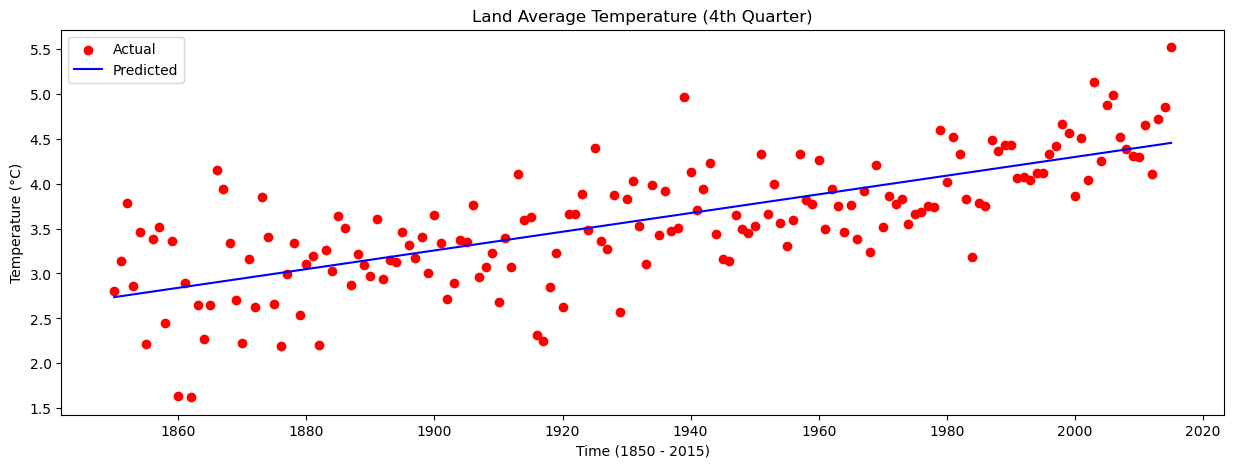

In [1257]:
plt.figure(figsize=(15, 5))
plt.scatter(x_4th_date, y_4th[:,0].flatten(), color='red', label='Actual')
plt.plot(x_4th_date, y_4th_predicted, color='blue', label='Predicted')
plt.title('Land Average Temperature (4th Quarter)')
plt.xlabel('Time (1850 - 2015)')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.show()

## Plotting Land and Ocean Average Temperature results

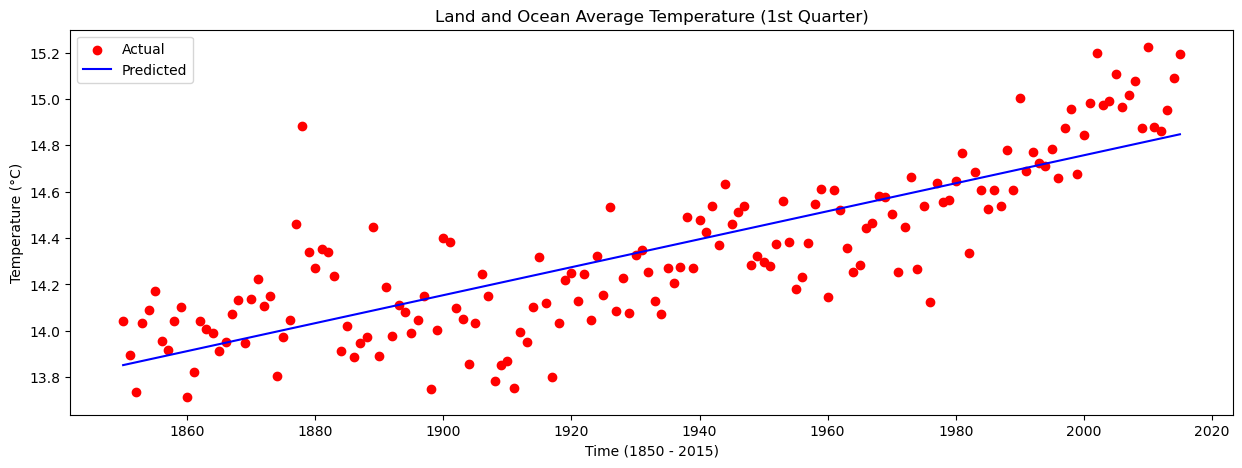

In [1258]:
plt.figure(figsize=(15, 5))
plt.scatter(x_1st_date, y_1st_landO[:,0].flatten(), color='red', label='Actual')
plt.plot(x_1st_date, y_1st_LO_predicted, color='blue', label='Predicted')
plt.title('Land and Ocean Average Temperature (1st Quarter)')
plt.xlabel('Time (1850 - 2015)')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.show()

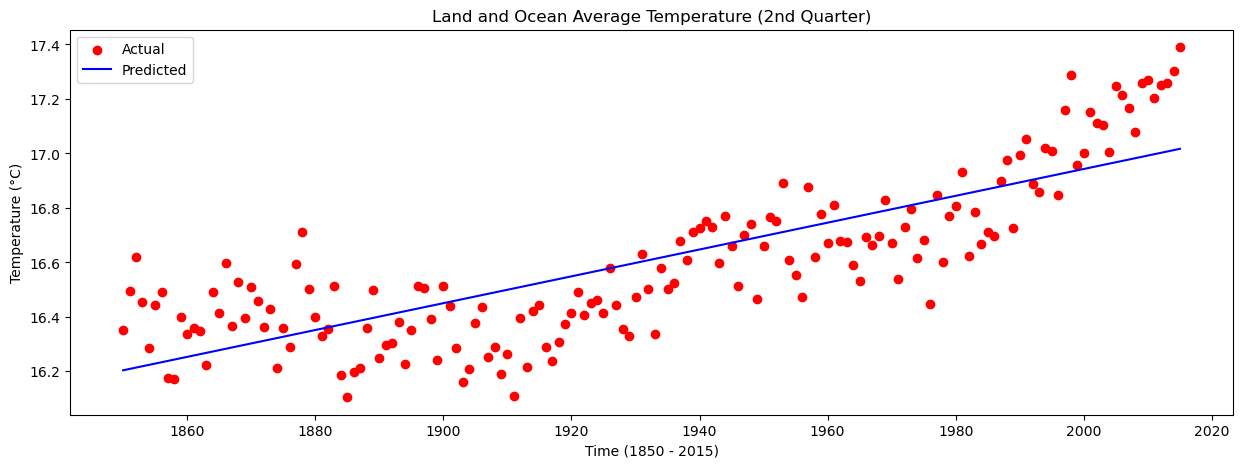

In [1259]:
plt.figure(figsize=(15, 5))
plt.scatter(x_2nd_date, y_2nd_landO[:,0].flatten(), color='red', label='Actual')
plt.plot(x_2nd_date, y_2nd_LO_predicted, color='blue', label='Predicted')
plt.title('Land and Ocean Average Temperature (2nd Quarter)')
plt.xlabel('Time (1850 - 2015)')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.show()

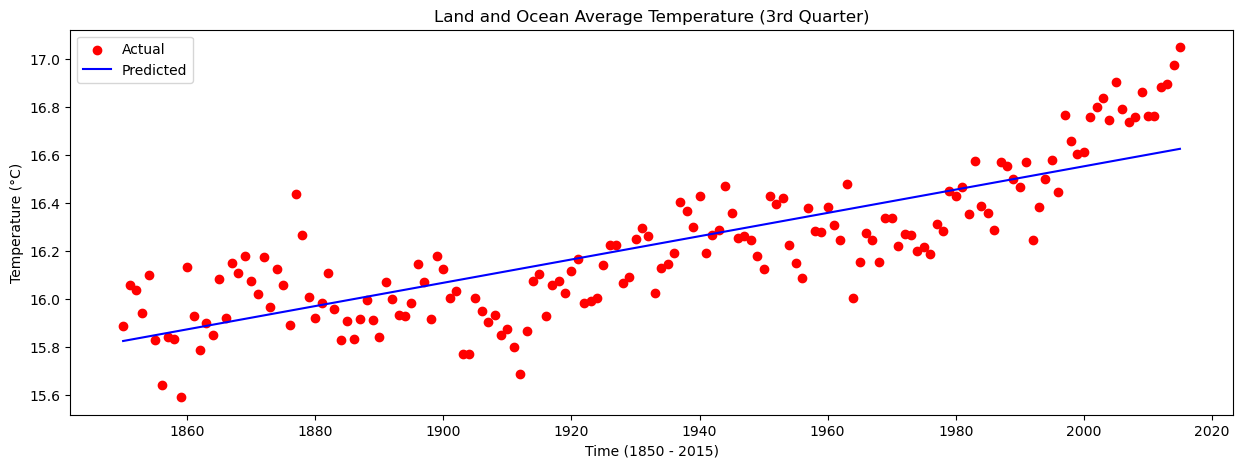

In [1260]:
plt.figure(figsize=(15, 5))
plt.scatter(x_3rd_date, y_3rd_landO[:,0].flatten(), color='red', label='Actual')
plt.plot(x_3rd_date, y_3rd_LO_predicted, color='blue', label='Predicted')
plt.title('Land and Ocean Average Temperature (3rd Quarter)')
plt.xlabel('Time (1850 - 2015)')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.show()

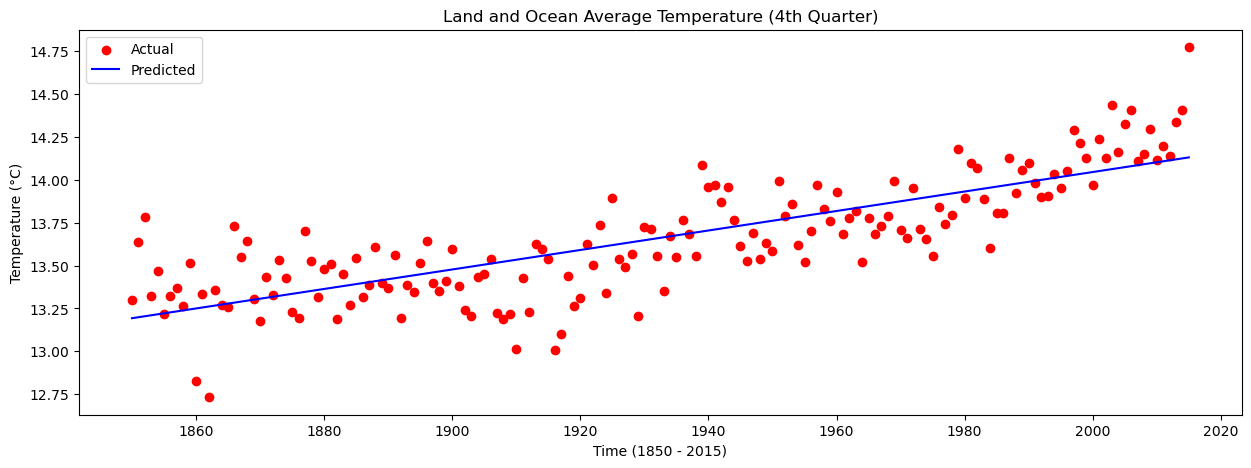

In [1261]:
plt.figure(figsize=(15, 5))
plt.scatter(x_4th_date, y_4th_landO[:,0].flatten(), color='red', label='Actual')
plt.plot(x_4th_date, y_4th_LO_predicted, color='blue', label='Predicted')
plt.title('Land and Ocean Average Temperature (4th Quarter)')
plt.xlabel('Time (1850 - 2015)')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.show()

### Performance Metrics (First 4 represents Land Temperature Averages Only)

In [1262]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mean_ab_e = mean_absolute_error(y_1st_test,y_1st_pred)
mean_squared_e = mean_squared_error(y_1st_test, y_1st_pred)
r2 = r2_score(y_1st_test, y_1st_pred)

print(f"Mean Absolute Error: {mean_ab_e}")
print(f"Mean Squared Error: {mean_squared_e}")
print(f"R-Squared: {r2}")


Mean Absolute Error: 0.2837946305633037
Mean Squared Error: 0.14863293537860509
R-Squared: 0.5573940622008753


In [1263]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mean_ab_e = mean_absolute_error(y_2nd_test,y_2nd_pred)
mean_squared_e = mean_squared_error(y_2nd_test, y_2nd_pred)
r2 = r2_score(y_2nd_test, y_2nd_pred)

print(f"Mean Absolute Error: {mean_ab_e}")
print(f"Mean Squared Error: {mean_squared_e}")
print(f"R-Squared: {r2}")

Mean Absolute Error: 0.22728889304045072
Mean Squared Error: 0.07306608961745903
R-Squared: 0.6175689074154085


In [1264]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mean_ab_e = mean_absolute_error(y_3rd_test,y_3rd_pred)
mean_squared_e = mean_squared_error(y_3rd_test, y_3rd_pred)
r2 = r2_score(y_3rd_test, y_3rd_pred)

print(f"Mean Absolute Error: {mean_ab_e}")
print(f"Mean Squared Error: {mean_squared_e}")
print(f"R-Squared: {r2}")

Mean Absolute Error: 0.21969052945680936
Mean Squared Error: 0.07356095577937227
R-Squared: 0.7148259165842055


In [1265]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mean_ab_e = mean_absolute_error(y_4th_test,y_4th_pred)
mean_squared_e = mean_squared_error(y_4th_test, y_4th_pred)
r2 = r2_score(y_4th_test, y_4th_pred)

print(f"Mean Absolute Error: {mean_ab_e}")
print(f"Mean Squared Error: {mean_squared_e}")
print(f"R-Squared: {r2}")

Mean Absolute Error: 0.364773646660365
Mean Squared Error: 0.18860133987582617
R-Squared: 0.5622720037729452


### Performance Metrics of the Land and Ocean Averages Below

In [1266]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mean_ab_e = mean_absolute_error(y_1st_test_LO,y_1st_pred_LO)
mean_squared_e = mean_squared_error(y_1st_test_LO, y_1st_pred_LO)
r2 = r2_score(y_1st_test_LO, y_1st_pred_LO)

print(f"Mean Absolute Error: {mean_ab_e}")
print(f"Mean Squared Error: {mean_squared_e}")
print(f"R-Squared: {r2}")

Mean Absolute Error: 0.1638185774143169
Mean Squared Error: 0.04244455542557164
R-Squared: 0.6481646035219167


In [1267]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mean_ab_e = mean_absolute_error(y_2nd_test_LO,y_2nd_pred_LO)
mean_squared_e = mean_squared_error(y_2nd_test_LO, y_2nd_pred_LO)
r2 = r2_score(y_2nd_test_LO, y_2nd_pred_LO)

print(f"Mean Absolute Error: {mean_ab_e}")
print(f"Mean Squared Error: {mean_squared_e}")
print(f"R-Squared: {r2}")

Mean Absolute Error: 0.14327374058671094
Mean Squared Error: 0.029596075829365107
R-Squared: 0.68402504064573


In [1268]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mean_ab_e = mean_absolute_error(y_3rd_test_LO,y_3rd_pred_LO)
mean_squared_e = mean_squared_error(y_3rd_test_LO, y_3rd_pred_LO)
r2 = r2_score(y_3rd_test_LO, y_3rd_pred_LO)

print(f"Mean Absolute Error: {mean_ab_e}")
print(f"Mean Squared Error: {mean_squared_e}")
print(f"R-Squared: {r2}")

Mean Absolute Error: 0.13142357490157033
Mean Squared Error: 0.026474353144069252
R-Squared: 0.7415046849367921


In [1269]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mean_ab_e = mean_absolute_error(y_4th_test_LO,y_4th_pred_LO)
mean_squared_e = mean_squared_error(y_4th_test_LO, y_4th_pred_LO)
r2 = r2_score(y_4th_test_LO, y_4th_pred_LO)

print(f"Mean Absolute Error: {mean_ab_e}")
print(f"Mean Squared Error: {mean_squared_e}")
print(f"R-Squared: {r2}")

Mean Absolute Error: 0.1434130097047362
Mean Squared Error: 0.03390712942938982
R-Squared: 0.7122716494908374
